In [1]:
# Importing the libraries I’ll use for this analysis

import pandas as pd      # for handling the dataset
import numpy as np       # for some numerical operations
import matplotlib.pyplot as plt   # for creating visual plots
import seaborn as sns    # for pretty charts and graphs

# This line makes sure all my plots show inside the notebook
%matplotlib inline


In [2]:
# Reading the Netflix dataset from the CSV file I downloaded
df = pd.read_csv('netflix_titles.csv')

# Just checking the shape of the data: how many rows and columns
print("Shape of the dataset:", df.shape)

# Let me take a sneak peek at the first 5 rows
df.head()


Shape of the dataset: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# This gives a quick idea of data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# I want to check the list of column names
print("Column names:", df.columns.tolist())

# Checking basic summary of numeric columns (if any)
df.describe()


Column names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
# Let's see how many null/missing values are there in each column
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Some columns like director, cast, and country have missing data
# I'm going to fill or drop where it makes sense

# Filling missing values in 'country' with "Unknown"
df['country'].fillna('Unknown', inplace=True)

# Filling missing director and cast with 'Not Specified'
df['director'].fillna('Not Specified', inplace=True)
df['cast'].fillna('Not Specified', inplace=True)

# I’m dropping rows where 'date_added' or 'rating' is missing
# because these are important for time-based or age-based analysis
df.dropna(subset=['date_added', 'rating'], inplace=True)


In [7]:
# The 'date_added' column is in string format
# I'm converting it into proper datetime format to work with it easily
df['date_added'] = pd.to_datetime(df['date_added'])

# Creating two new columns: Year and Month from the date
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [8]:
# The 'duration' column mixes numbers with text like '90 min', '1 Season'
# So I'm going to split them into two new columns: duration_int and duration_type

df[['duration_int', 'duration_type']] = df['duration'].str.extract('(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')


In [9]:
# Let me recheck if there are any missing values after all cleaning
df.isnull().sum()

# Also, I’ll check the final shape of the dataset
print("Final dataset shape after cleaning:", df.shape)


Final dataset shape after cleaning: (8793, 16)


In [10]:
df.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         3
listed_in        0
description      0
year_added       0
month_added      0
duration_int     3
duration_type    3
dtype: int64

In [11]:
# Just dropping those 3 rows where duration is missing
df.dropna(subset=['duration_int', 'duration_type'], inplace=True)

# Confirm that they're gone now
df.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added       0
month_added      0
duration_int     0
duration_type    0
dtype: int64

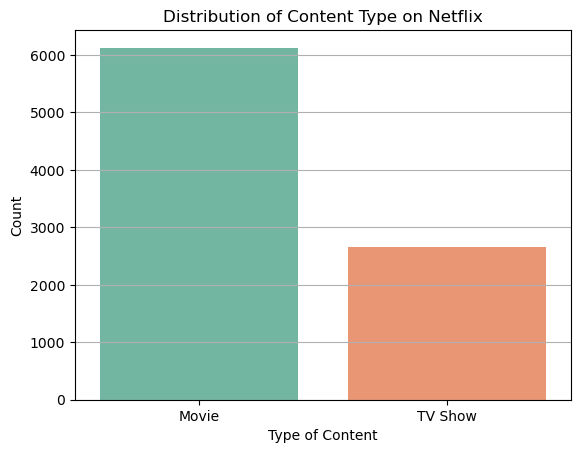

In [12]:
# Let me check whether Netflix has more Movies or TV Shows

sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


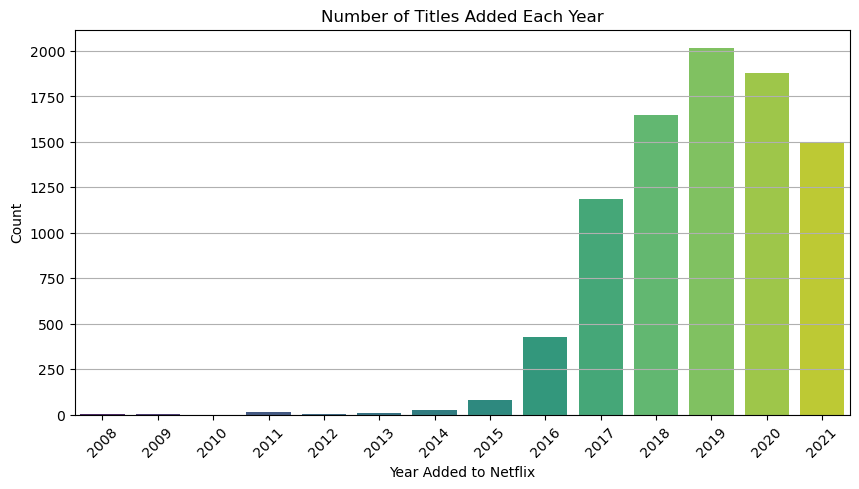

In [13]:
# Let's see in which year Netflix added the most content

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', palette='viridis', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=45)
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


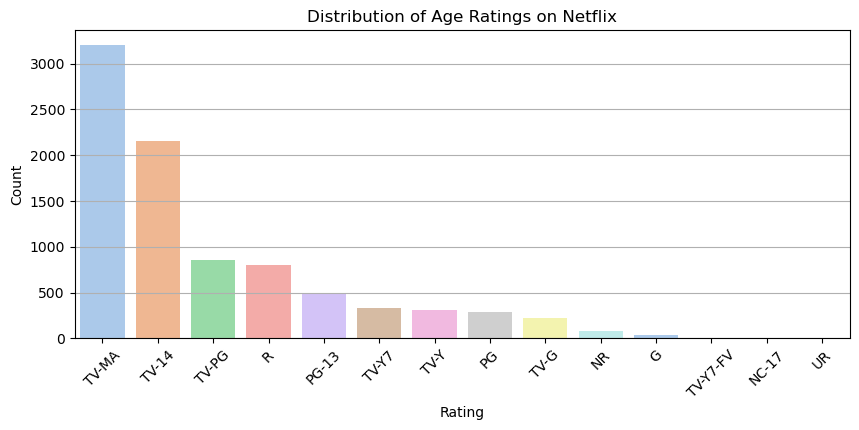

In [14]:
# Checking what kind of audience the content is made for

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='pastel')
plt.title('Distribution of Age Ratings on Netflix')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


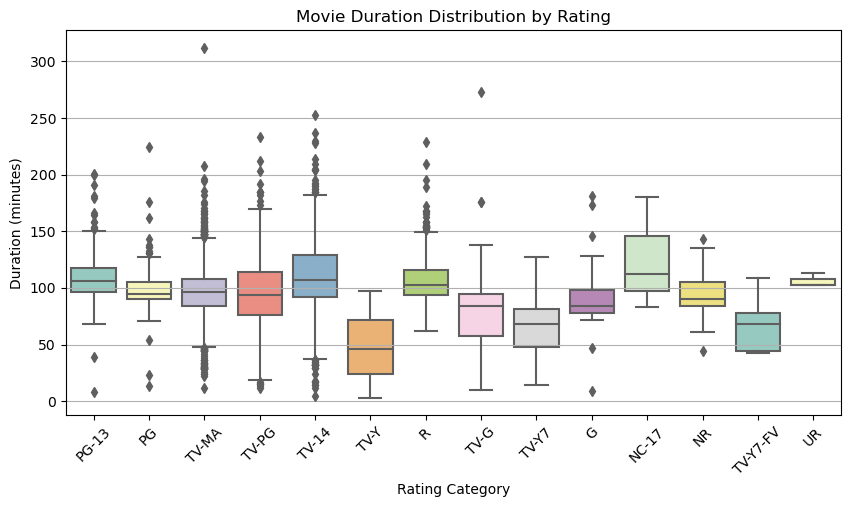

In [15]:
# I want to see how the movie duration varies by rating category
# (this only applies to Movies, so I’ll filter that first)

movie_df = df[df['type'] == 'Movie']

plt.figure(figsize=(10,5))
sns.boxplot(data=movie_df, x='rating', y='duration_int', palette='Set3')
plt.title('Movie Duration Distribution by Rating')
plt.xlabel('Rating Category')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


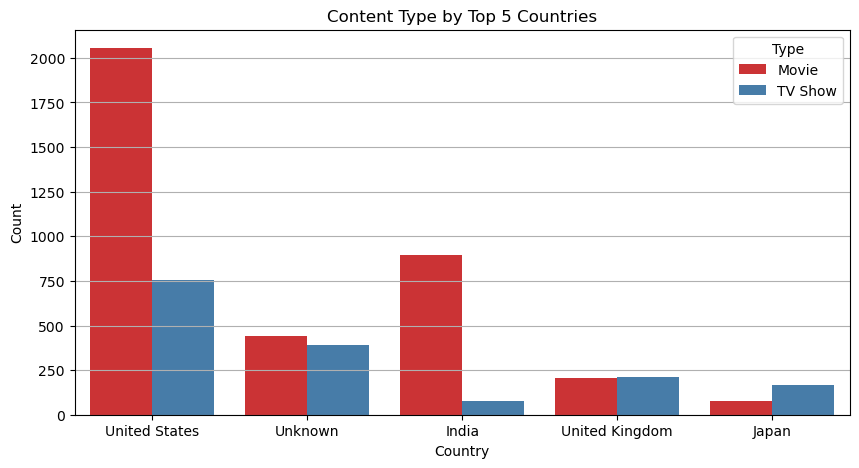

In [16]:
# I'm comparing how many Movies vs TV Shows each of the top 5 countries has

top_5_countries = df['country'].value_counts().head(5).index
df_top_countries = df[df['country'].isin(top_5_countries)]

plt.figure(figsize=(10,5))
sns.countplot(data=df_top_countries, x='country', hue='type', palette='Set1')
plt.title('Content Type by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Type')
plt.grid(axis='y')
plt.show()


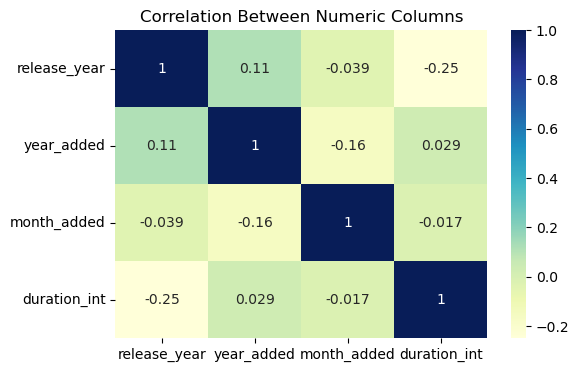

In [17]:
# Just checking correlation between numeric fields for curiosity

plt.figure(figsize=(6,4))
sns.heatmap(df[['release_year', 'year_added', 'month_added', 'duration_int']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Between Numeric Columns')
plt.show()
